In [1]:
import pandas as pd
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df.drop(columns=["Cabin", "Name", "Ticket"], inplace=True)



In [4]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [6]:
# Remove spaces (if any) from text
df['Sex'] = df['Sex'].str.strip()
df['Embarked'] = df['Embarked'].str.strip()

# Map text to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

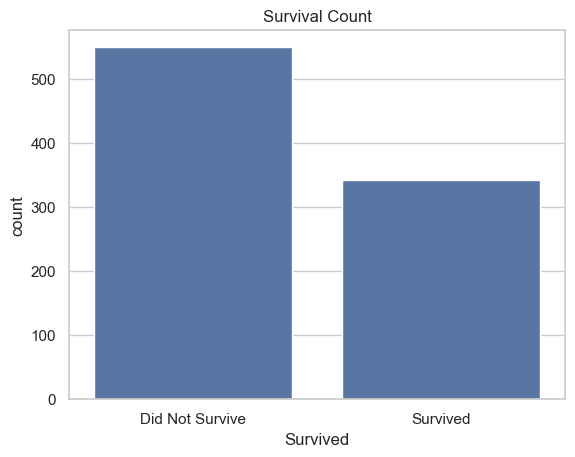

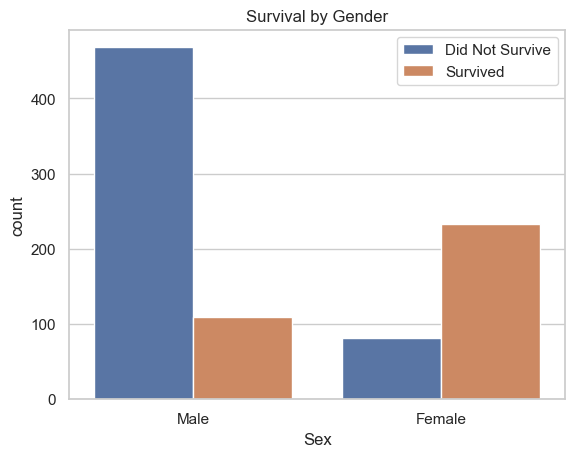

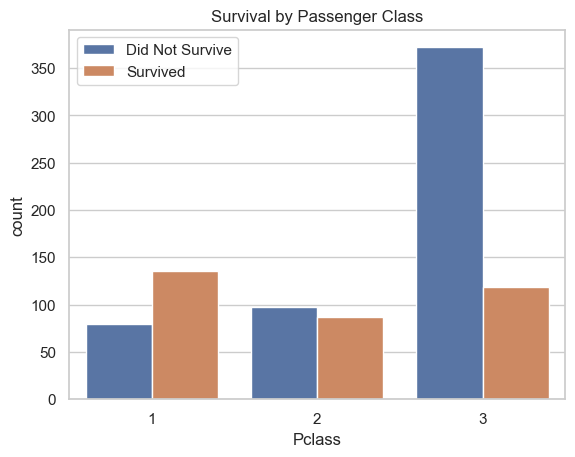

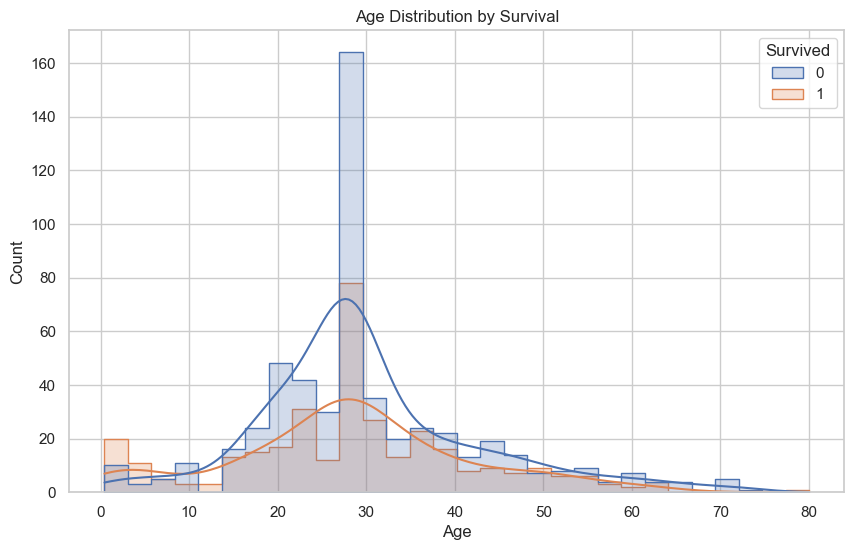

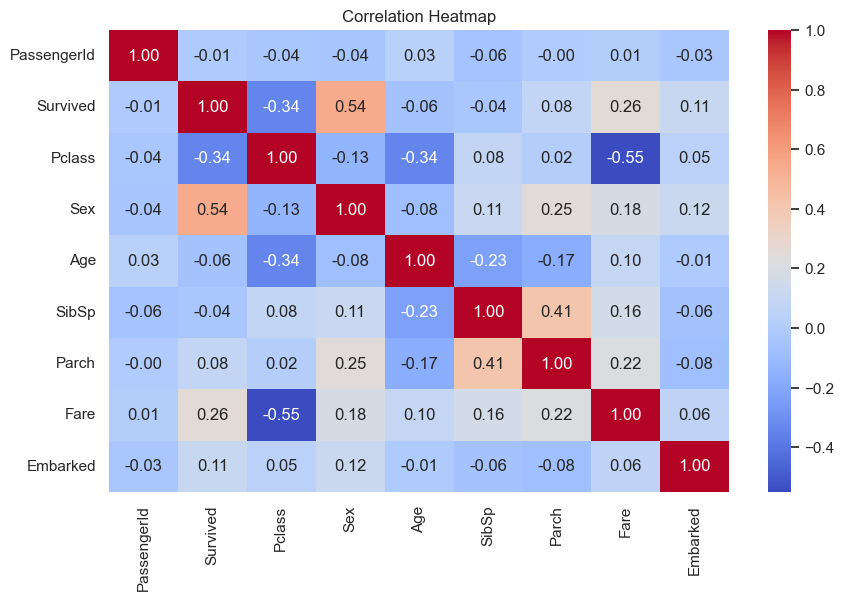

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 1. Survival count
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

# 2. Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()

# 3. Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()

# 4. Age distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, hue='Survived', element='step')
plt.title('Age Distribution by Survival')
plt.show()

# 5. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
X = df.drop(columns=["PassengerId", "Survived"])  
y = df["Survived"]                                


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


print(" Accuracy:", accuracy_score(y_test, y_pred))


print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


print(" Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.7988826815642458
🧩 Confusion Matrix:
 [[89 16]
 [20 54]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

